In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
dir_path = "./cifar_PNG_train"
fig = plt.figure(figsize=(25, 4))
category = os.listdir(dir_path)

<Figure size 2500x400 with 0 Axes>

In [17]:
category

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [21]:
img_name = os.listdir(os.path.join(dir_path , category[0]))

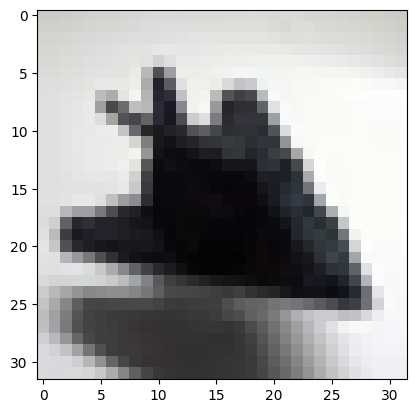

In [23]:
im = Image.open(os.path.join(dir_path , category[0],img_name[0]))
plt.imshow(im)

In [34]:
print(im.size)

(32, 32)


In [24]:
import torch
import torchvision
from torchvision import transforms

In [11]:
#自作データセットを作成するには、PyTorchのDatasetクラスを継承する必要があります。
#独自データセットを作成する際には、『__len__(), __getitem__()』を必ず作成します。
#この処理を記述することで、DataLoaderを使用可能になります。

In [39]:


# image_sizeやmean, stdはデータに合わせて設定してください。
image_size = 32
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# trainデータとvalidationデータが入っているディレクトリのパスを指定
train_image_dir = "./cifar_PNG_train"
val_image_dir = "./cifar_PNG_test"

# trainデータ向けとvalidationデータ向けに、transformを用意します。
# 皆さんのやりたいことに合わせて適宜変更してください。
data_transform = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(image_size, scale=(0.5, 1.0)),
        #transforms.RandomHorizontalFlip(),
        #transforms.RandomRotation(degrees=[-15, 15]),
        transforms.ToTensor(),
        #transforms.Normalize(mean, std),
        #transforms.RandomErasing(0.5),
    ]),
    'val': transforms.Compose([
        #transforms.Resize(image_size),
        #transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        #transforms.Normalize(mean, std)
    ])
}

# torchvision.datasets.ImageFolderでデータの入っているディレクトリのパスと
# transformを指定してあげるだけ。
train_dataset = torchvision.datasets.ImageFolder(root=train_image_dir, transform=data_transform['train'])
val_dataset = torchvision.datasets.ImageFolder(root=val_image_dir, transform=data_transform['val'])

# Datasetができたら、dataloaderに渡してあげればOK
batch_size = 128
train_dataLoader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
val_dataLoader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False
)


In [40]:
train_dataset = torchvision.datasets.ImageFolder(root=train_image_dir, transform=data_transform['train'])
val_dataset = torchvision.datasets.ImageFolder(root=val_image_dir, transform=data_transform['val'])

In [41]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./cifar_PNG_train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [42]:
for X, y in val_dataLoader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of y: torch.Size([128]) torch.int64


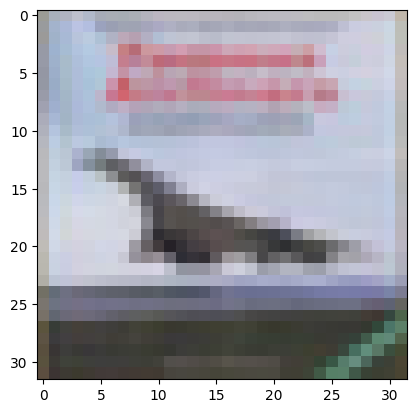

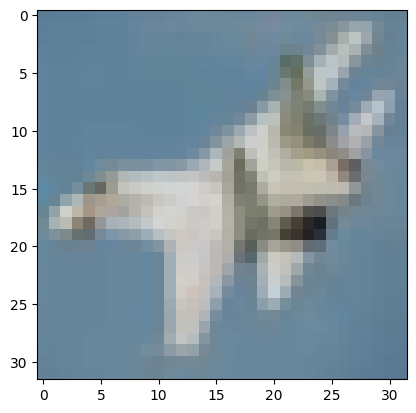

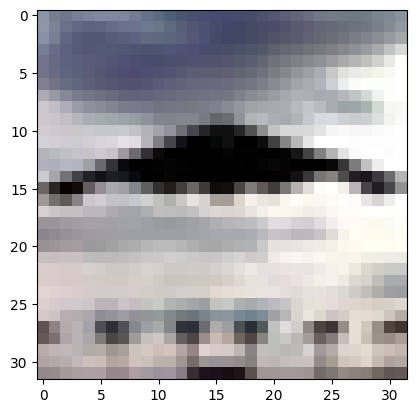

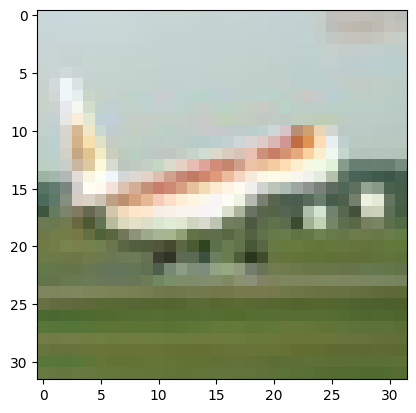

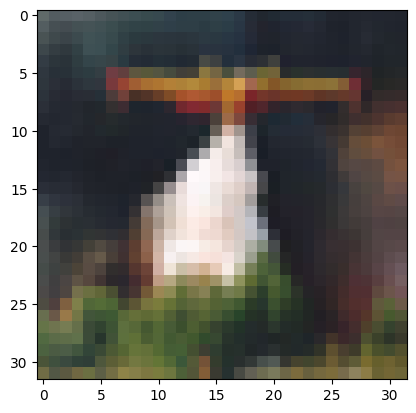

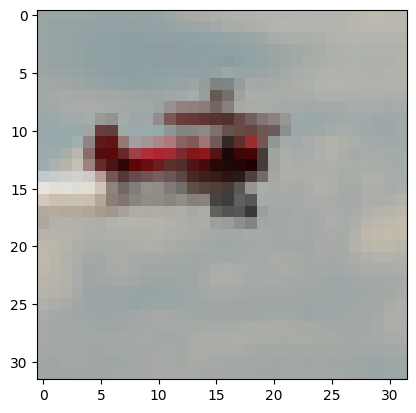

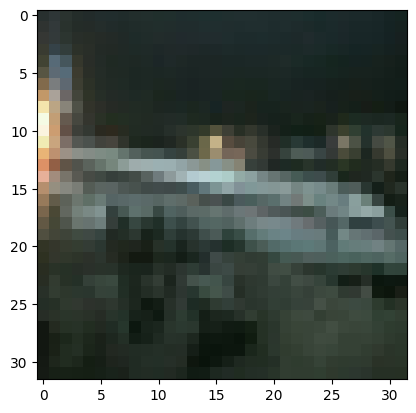

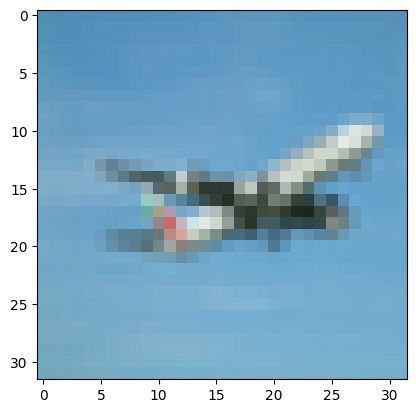

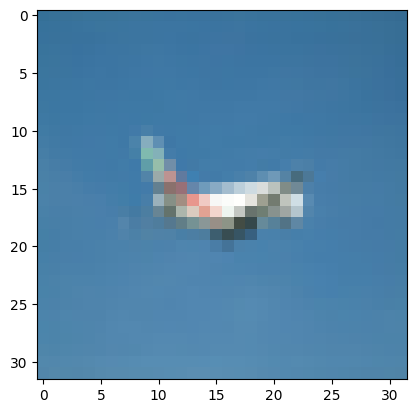

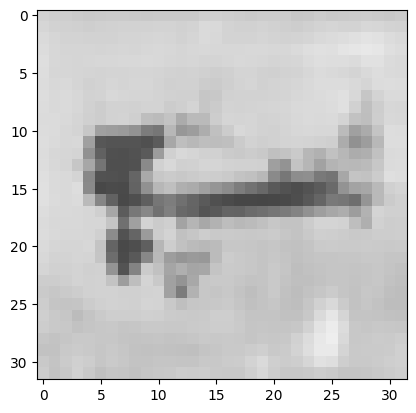

In [71]:
def image_show(data_loader,n):
    #Augmentationした画像データを読み込む
    tmp = iter(data_loader)
    images,labels = next(tmp)
    #画像をtensorからnumpyに変換
    images = images.numpy()
    #n枚の画像を1枚ずつ取り出し、表示する
    for i in range(n):
        image = np.transpose(images[i],[1,2,0])
        plt.imshow(image)
        plt.show()

image_show(val_dataLoader,10)
